In [17]:
import pandas as pd
from pybrainlife.data.collect import collect_data
import pybrainlife.data.manipulate as pybldm
import pybrainlife.vis.plots as pyblvp
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# collect_data(datatype name, list of datatype tags, list of object tags, filename, output file name, whether it's a network adjaceny matrix or not)
tractmeasures_df,_,_ = collect_data('neuro/tractmeasures',['profiles'],['cleaned', '10_20_2023'],'tractmeasures.csv','tractmeasures_micro.csv')
tractmeasures_df.head(5)

,subjectID,structureID,nodeID,ad,ad_sd,ad_inverse_mean,ad_inverse_sd,fa,fa_sd,fa_inverse_mean,...,rd_sd,rd_inverse_mean,rd_inverse_sd,x_coords,y_coords,z_coords,sessionID,tags,datatype_tags,finish_dates
0,585862,ROIthalamus8115ROIlhonset,1,1.204346,0.085365,0.838818,0.049532,0.191501,0.044749,5.687484,...,0.030998,1.118905,0.041152,-11.013259,-26.396885,-2.446358,1,[10_20_2023],[profiles],2023-10-23T17:32:59.618Z
1,585862,ROIthalamus8115ROIlhonset,2,1.222013,0.072530,0.824753,0.041834,0.193084,0.041286,5.618346,...,0.027089,1.109757,0.036057,-11.234176,-26.305239,-2.302050,1,[10_20_2023],[profiles],2023-10-23T17:32:59.618Z
2,585862,ROIthalamus8115ROIlhonset,3,1.234838,0.062232,0.814995,0.036143,0.196042,0.039884,5.517146,...,0.026153,1.106014,0.034523,-11.461488,-26.216857,-2.154040,1,[10_20_2023],[profiles],2023-10-23T17:32:59.618Z
3,585862,ROIthalamus8115ROIlhonset,4,1.248463,0.053767,0.805462,0.031309,0.203614,0.040260,5.296656,...,0.029517,1.108840,0.038967,-11.693194,-26.130124,-2.001189,1,[10_20_2023],[profiles],2023-10-23T17:32:59.618Z
4,585862,ROIthalamus8115ROIlhonset,5,1.263855,0.047546,0.795218,0.027328,0.217584,0.040974,4.935513,...,0.035609,1.120238,0.047597,-11.927218,-26.043473,-1.842571,1,[10_20_2023],[profiles],2023-10-23T17:32:59.618Z


In [19]:
tractmeasures_df = tractmeasures_df.loc[tractmeasures_df['structureID'] != 'wbfg']
tractmeasures_df.head()

,subjectID,structureID,nodeID,ad,ad_sd,ad_inverse_mean,ad_inverse_sd,fa,fa_sd,fa_inverse_mean,...,rd_sd,rd_inverse_mean,rd_inverse_sd,x_coords,y_coords,z_coords,sessionID,tags,datatype_tags,finish_dates
0,585862,ROIthalamus8115ROIlhonset,1,1.204346,0.085365,0.838818,0.049532,0.191501,0.044749,5.687484,...,0.030998,1.118905,0.041152,-11.013259,-26.396885,-2.446358,1,[10_20_2023],[profiles],2023-10-23T17:32:59.618Z
1,585862,ROIthalamus8115ROIlhonset,2,1.222013,0.072530,0.824753,0.041834,0.193084,0.041286,5.618346,...,0.027089,1.109757,0.036057,-11.234176,-26.305239,-2.302050,1,[10_20_2023],[profiles],2023-10-23T17:32:59.618Z
2,585862,ROIthalamus8115ROIlhonset,3,1.234838,0.062232,0.814995,0.036143,0.196042,0.039884,5.517146,...,0.026153,1.106014,0.034523,-11.461488,-26.216857,-2.154040,1,[10_20_2023],[profiles],2023-10-23T17:32:59.618Z
3,585862,ROIthalamus8115ROIlhonset,4,1.248463,0.053767,0.805462,0.031309,0.203614,0.040260,5.296656,...,0.029517,1.108840,0.038967,-11.693194,-26.130124,-2.001189,1,[10_20_2023],[profiles],2023-10-23T17:32:59.618Z
4,585862,ROIthalamus8115ROIlhonset,5,1.263855,0.047546,0.795218,0.027328,0.217584,0.040974,4.935513,...,0.035609,1.120238,0.047597,-11.927218,-26.043473,-1.842571,1,[10_20_2023],[profiles],2023-10-23T17:32:59.618Z


In [20]:
# only use subjects with sufficient streamlines 
subjectsIncluded = ['100206', '100408', '101107', '125525', '161832', '169747', '199352', '206828', '211215', '585862', '803240', '816653']
tractmeasures_df = tractmeasures_df.loc[tractmeasures_df['subjectID'].isin(subjectsIncluded)]

In [21]:
tractmeasures_df.groupby(['structureID']).mean(numeric_only = True)

,nodeID,ad,ad_sd,ad_inverse_mean,ad_inverse_sd,fa,fa_sd,fa_inverse_mean,fa_inverse_sd,md,md_sd,md_inverse_mean,md_inverse_sd,rd,rd_sd,rd_inverse_mean,rd_inverse_sd,x_coords,y_coords,z_coords
structureID,,,,,,,,,,,,,,,,,,,,
ROIthalamus8115ROIlhonset,100.5,1.377047,0.143613,0.751310,0.082613,0.498436,0.073758,2.303036,0.530772,0.869372,0.056073,1.167416,0.077267,0.615535,0.066569,1.721343,0.215382,-35.183166,-29.186961,3.535775
ROIthalamus8115ROIlhpmhg,100.5,1.373487,0.111899,0.756270,0.063570,0.507023,0.060395,2.305009,0.401775,0.853085,0.039277,1.191572,0.055909,0.592884,0.055043,1.832252,0.205679,-23.977114,-26.430928,2.414879
ROIthalamus8215ROIrhonset,100.5,1.429280,0.134849,0.722002,0.072039,0.482303,0.071975,2.374884,0.554651,0.909157,0.050717,1.111684,0.061849,0.649096,0.066143,1.605388,0.175670,34.706698,-29.587890,9.021544
ROIthalamus8215ROIrhpmhg,100.5,1.409511,0.111706,0.734230,0.059899,0.488026,0.059864,2.376656,0.400798,0.887550,0.038550,1.136707,0.049280,0.626569,0.053205,1.672127,0.161377,25.980261,-25.621857,4.254240


In [22]:
micro_stats = tractmeasures_df.loc[:, ['structureID', 'fa', 'fa_sd', 'md', 'md_sd', 'ad', 'ad_sd', 'rd', 'rd_sd']].groupby(['structureID']).mean(numeric_only = True)
micro_stats = micro_stats.reset_index()
micro_stats

,structureID,fa,fa_sd,md,md_sd,ad,ad_sd,rd,rd_sd
0,ROIthalamus8115ROIlhonset,0.498436,0.073758,0.869372,0.056073,1.377047,0.143613,0.615535,0.066569
1,ROIthalamus8115ROIlhpmhg,0.507023,0.060395,0.853085,0.039277,1.373487,0.111899,0.592884,0.055043
2,ROIthalamus8215ROIrhonset,0.482303,0.071975,0.909157,0.050717,1.429280,0.134849,0.649096,0.066143
3,ROIthalamus8215ROIrhpmhg,0.488026,0.059864,0.887550,0.038550,1.409511,0.111706,0.626569,0.053205


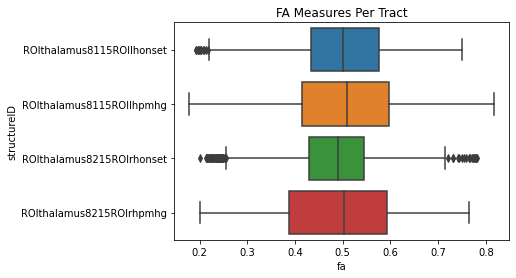

In [23]:
sns.boxplot(data=tractmeasures_df, x="fa", y = 'structureID')
plt.title('FA Measures Per Tract');

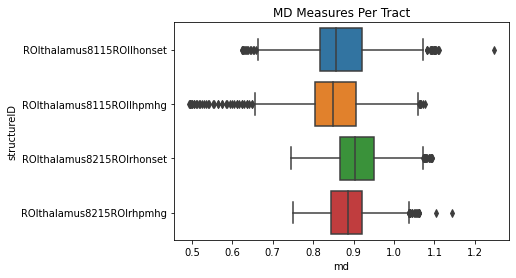

In [24]:
sns.boxplot(data=tractmeasures_df, x="md", y = 'structureID')
plt.title('MD Measures Per Tract');

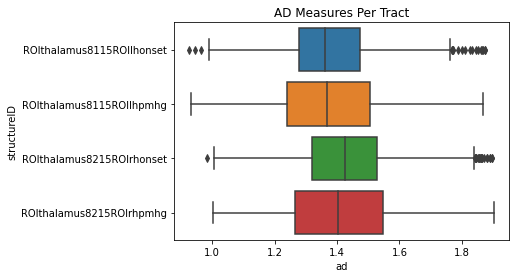

In [25]:
sns.boxplot(data=tractmeasures_df, x="ad", y = 'structureID')
plt.title('AD Measures Per Tract');

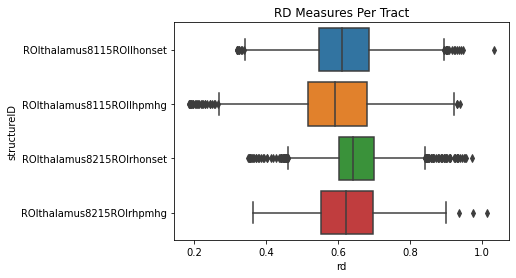

In [27]:
sns.boxplot(data=tractmeasures_df, x="rd", y = 'structureID')
plt.title('RD Measures Per Tract');

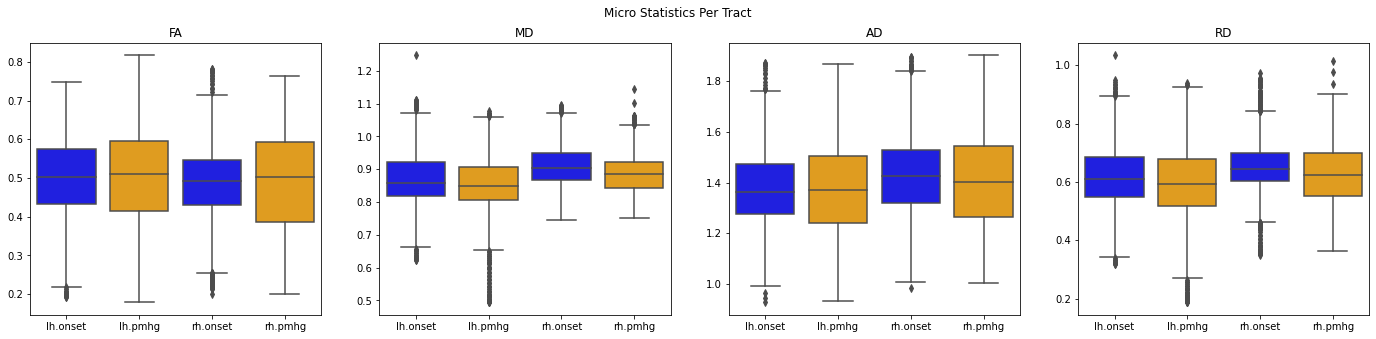

In [30]:
labels = ['lh.onset', 'lh.pmhg', 'rh.onset', 'rh.pmhg']
colors = ['blue', 'orange', 'blue', 'orange']
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

sns.boxplot(data=tractmeasures_df, y="fa", x='structureID', orient='v', palette=colors, ax=axes[0])
axes[0].set_title('FA')
axes[0].set_xticks(range(len(labels)))
axes[0].set_xticklabels(labels)
axes[0].set_ylabel('')
axes[0].set_xlabel('')

sns.boxplot(data=tractmeasures_df, y="md", x='structureID', orient='v', palette=colors, ax=axes[1])
axes[1].set_title('MD')
axes[1].set_xticks(range(len(labels)))
axes[1].set_xticklabels(labels)
axes[1].set_ylabel('')
axes[1].set_xlabel('')

sns.boxplot(data=tractmeasures_df, y="ad", x='structureID', orient='v', palette=colors, ax=axes[2])
axes[2].set_title('AD')
axes[2].set_xticks(range(len(labels)))
axes[2].set_xticklabels(labels)
axes[2].set_ylabel('')
axes[2].set_xlabel('')

sns.boxplot(data=tractmeasures_df, y="rd", x='structureID', orient='v', palette=colors, ax=axes[3])
axes[3].set_title('RD')
axes[3].set_xticks(range(len(labels)))
axes[3].set_xticklabels(labels)
axes[3].set_ylabel('')
axes[3].set_xlabel('')

plt.suptitle('Micro Statistics Per Tract');